In [2]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Test and Train
train=pd.read_csv("loan.csv")
test= pd.read_csv("loan_test.csv")

In [4]:
# Copy of original data
train_original=train.copy()

In [5]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test=test.drop(['Loan_Status'], axis=1)

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
# Copy of original data
train_original=train.copy()

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     14
Credit_History       38
Property_Area         0
Loan_Status           0
dtype: int64

### UNi Variate analysis

In [12]:
# Convert Dependents to str
test['Dependents'] = test["Dependents"].astype('str')

In [13]:
train['Loan_Status'].value_counts()

Y    329
N    149
Name: Loan_Status, dtype: int64

In [14]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.688285
N    0.311715
Name: Loan_Status, dtype: float64

#### Uni - Variate Analysis

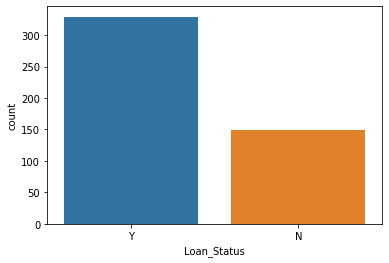

In [15]:
# Bar graph for load_status
sns.countplot(x="Loan_Status", data=train)

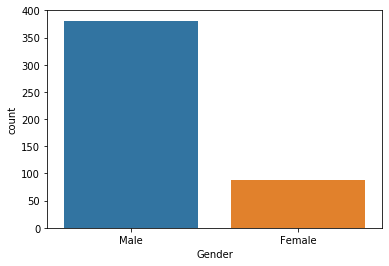

In [16]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

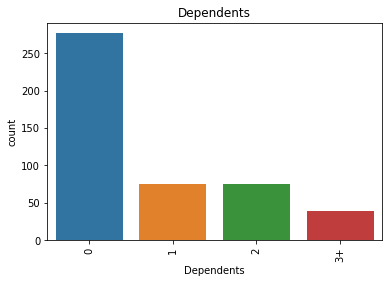

In [17]:
# Bar graph for dependents 
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
sns.countplot(x="Dependents", data=train)

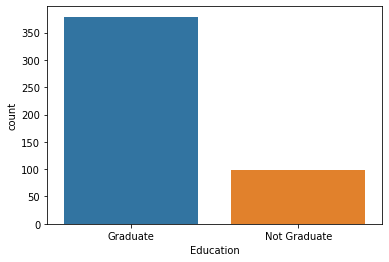

In [18]:
sns.countplot("Education", data =train)

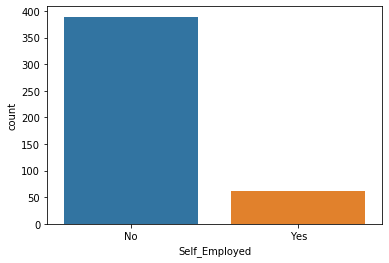

In [19]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

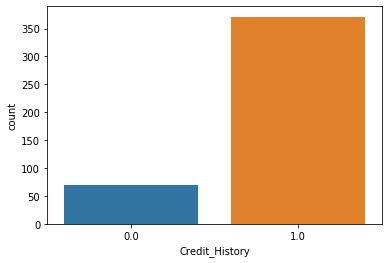

In [20]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

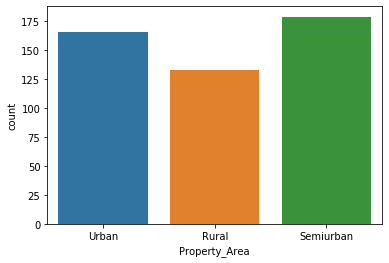

In [21]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

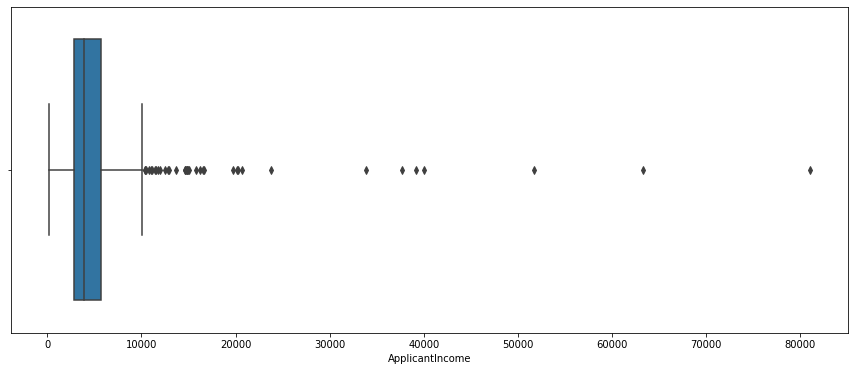

In [22]:
# Visualizing numerical features
fig,ax = plt.subplots( figsize=(15,6))
sns.boxplot(x="ApplicantIncome",data=train, ax= ax)

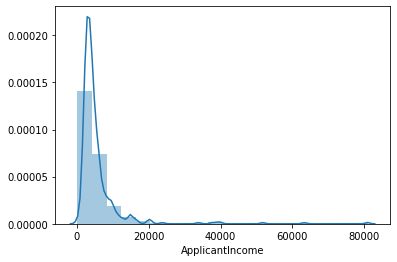

In [23]:
sns.distplot(train["ApplicantIncome"], bins=20)

Text(0.5, 0.98, '')

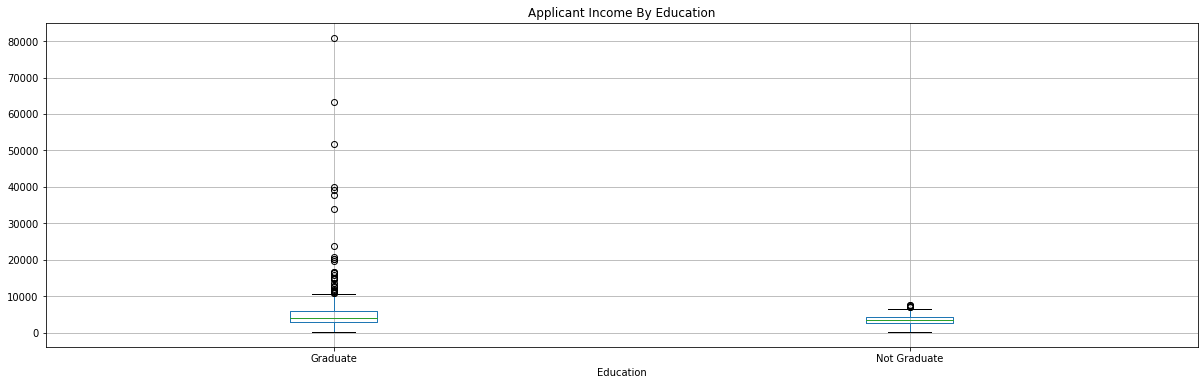

In [24]:
train.boxplot(column='ApplicantIncome', by = 'Education', figsize=(20,6))
plt.title("Applicant Income By Education")
plt.suptitle("")  # Suppress default title

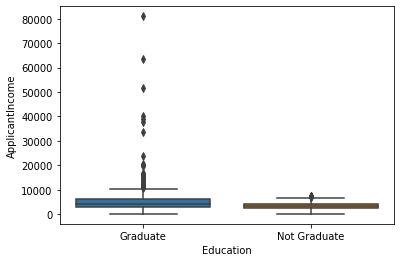

In [25]:
sns.boxplot(x="Education",y="ApplicantIncome",data=train)

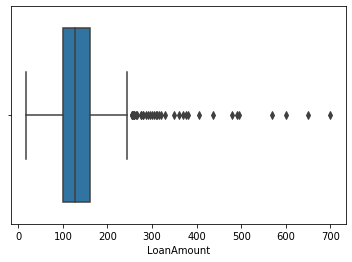

In [26]:
sns.boxplot(train["LoanAmount"])

#### Bi - Variate Analysis

  Loan_Status  Gender Married  Count
0           N  Female      No     23
1           N  Female     Yes      8
2           N    Male      No     37
3           N    Male     Yes     78
4           Y  Female      No     41
5           Y  Female     Yes     15
6           Y    Male      No     67
7           Y    Male     Yes    197


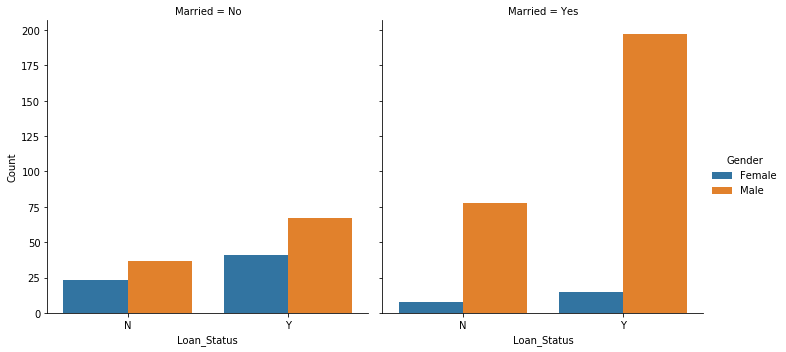

In [27]:
d = train.groupby(by=["Loan_Status","Gender","Married"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Loan_Status",y="Count", hue="Gender",col="Married", data=d, kind="bar")

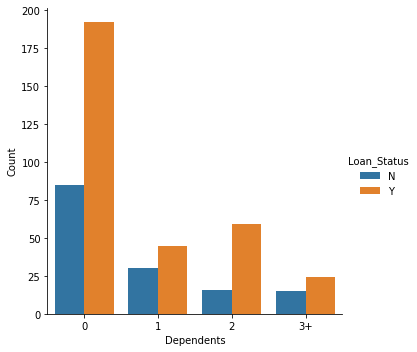

In [28]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Dependents",y="Count", hue="Loan_Status", data=d, kind="bar")

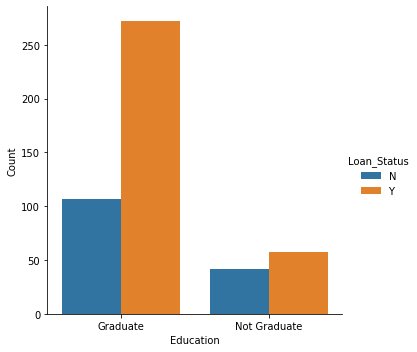

In [29]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Education",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Count
0           N            No    120
1           N           Yes     21
2           Y            No    269
3           Y           Yes     41


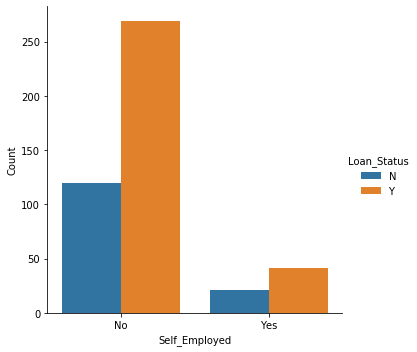

In [30]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Self_Employed",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status  Credit_History  Count
0           N             0.0     63
1           N             1.0     77
2           Y             0.0      6
3           Y             1.0    294


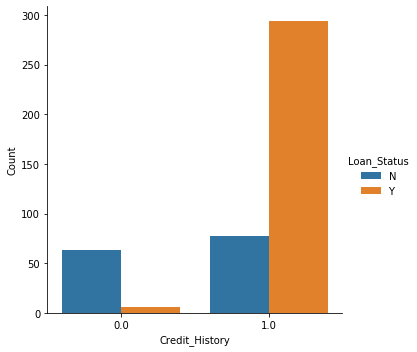

In [31]:

d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     53
1           N     Semiurban     39
2           N         Urban     57
3           Y         Rural     80
4           Y     Semiurban    140
5           Y         Urban    109


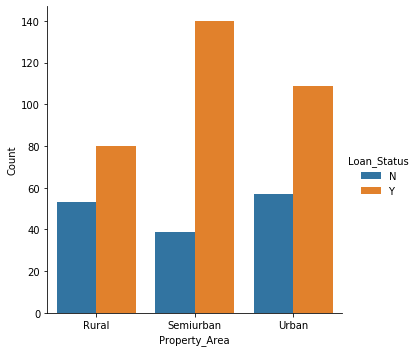

In [32]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [33]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [34]:
# Making bins for Applicant income variable in test
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
test['Income_Bin']=pd.cut(test['ApplicantIncome'],bins,labels=group)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 14 columns):
Loan_ID              478 non-null object
Gender               469 non-null object
Married              475 non-null object
Dependents           466 non-null object
Education            478 non-null object
Self_Employed        451 non-null object
ApplicantIncome      478 non-null int64
CoapplicantIncome    478 non-null float64
LoanAmount           461 non-null float64
Loan_Amount_Term     464 non-null float64
Credit_History       440 non-null float64
Property_Area        478 non-null object
Loan_Status          478 non-null object
Income_Bin           478 non-null category
dtypes: category(1), float64(4), int64(1), object(8)
memory usage: 49.3+ KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
Loan_ID              138 non-null object
Gender               134 non-null object
Married              138 non-null object
Dependents           138 non-null object
Education            138 non-null object
Self_Employed        133 non-null object
ApplicantIncome      138 non-null int64
CoapplicantIncome    138 non-null int64
LoanAmount           133 non-null float64
Loan_Amount_Term     138 non-null int64
Credit_History       126 non-null float64
Property_Area        138 non-null object
Income_Bin           138 non-null category
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 13.4+ KB


  Loan_Status Income_Bin  Count
0           N        Low     25
1           N    Average     50
2           N       High     36
3           N  Very high     38
4           Y        Low     61
5           Y    Average    120
6           Y       High     80
7           Y  Very high     68


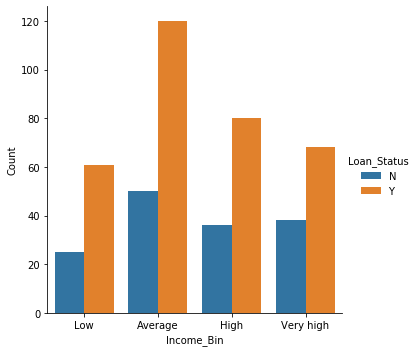

In [37]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [38]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low      1
1           N                Average     47
2           N                   High     24
3           Y                    Low     14
4           Y                Average    125
5           Y                   High     51


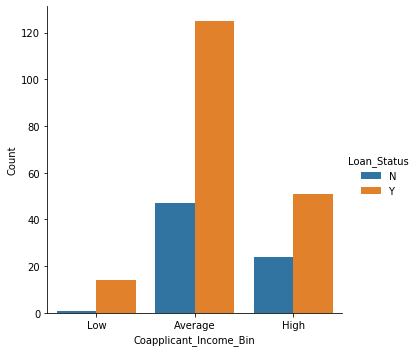

In [39]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [40]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)

  Loan_Status LoanAmount_Bin  Count
0           N            Low     34
1           N        Average     83
2           N           High     25
3           Y            Low     87
4           Y        Average    203
5           Y           High     29


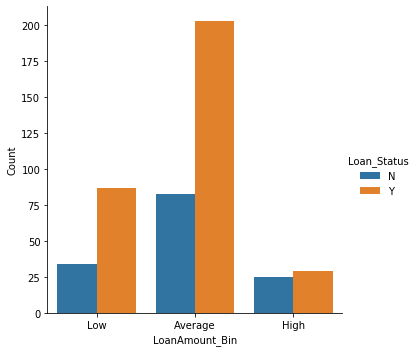

In [41]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
Loan_ID              138 non-null object
Gender               134 non-null object
Married              138 non-null object
Dependents           138 non-null object
Education            138 non-null object
Self_Employed        133 non-null object
ApplicantIncome      138 non-null int64
CoapplicantIncome    138 non-null int64
LoanAmount           133 non-null float64
Loan_Amount_Term     138 non-null int64
Credit_History       126 non-null float64
Property_Area        138 non-null object
Income_Bin           138 non-null category
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 13.4+ KB


In [43]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)
test=test.drop(['Income_Bin'], axis=1)

In [44]:
# Convert Dependents to str 
train['Dependents'] = train["Dependents"].astype('str')

In [45]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)
test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

In [46]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

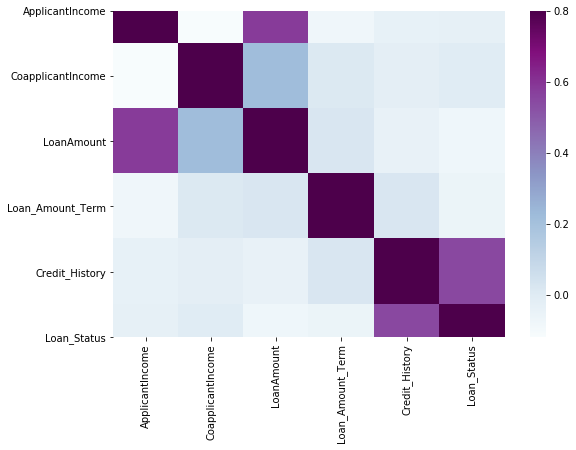

In [47]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


## Missing Values and Outlier Treatment

In [48]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     14
Credit_History       38
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [50]:
train['Loan_Amount_Term'].value_counts()

360.0    395
180.0     35
480.0     12
300.0     12
240.0      3
120.0      3
60.0       2
84.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [52]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [53]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
# Similar changes in test file
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

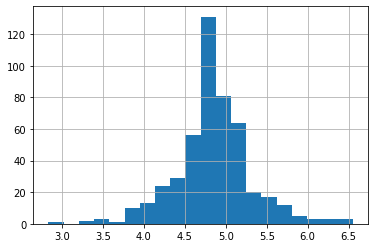

In [55]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [56]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [57]:
X_train = train.drop('Loan_Status',axis=1)
y_train = train.Loan_Status

# do the same for test
# X_test = test.drop('Loan_Status',axis=1)
X_test = test
# y_test = test.Loan_Status

In [58]:
# Adding dummies to the dataset
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [59]:

X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Dependents_nan',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [60]:
X_train.shape

(478, 22)

In [61]:
X_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Married_yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Dependents_nan', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

### Feature Engineering

In [65]:

# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

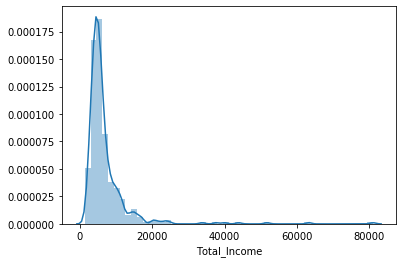

In [66]:
sns.distplot(train['Total_Income']);

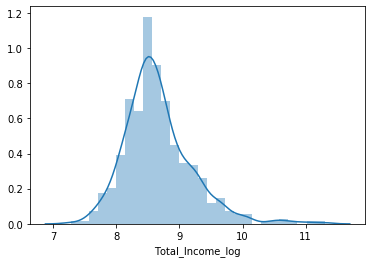

In [67]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [68]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*1000

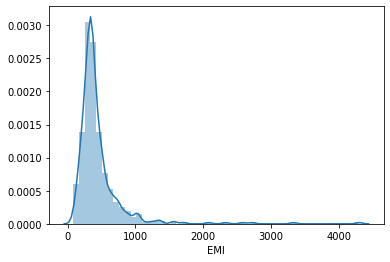

In [69]:
sns.distplot(train['EMI']);

In [70]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 
test['Balance Income']=test['Total_Income']-(test['EMI'])

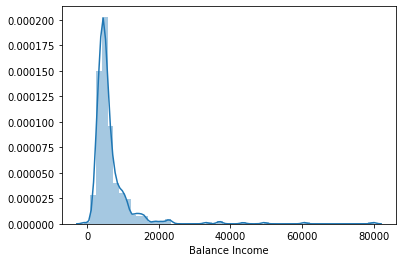

In [71]:
sns.distplot(train['Balance Income']);